# Sentiment Analysis

This stage of the project is dedicated to Sentiment Analysis, or popularly called 'opinion mining'. The aim is to determine the overall contextual polarity of a review. In this sense, a review is a reaction of a person to their experience in an establishment. 

This analysis does not determines if a sentence is objective or subjective, fact or opinion. Results of the text analysis will be shown as *positive*, *negative* or *neutral* opinion.

I will use NLTK Sentiment Analyser VADER for the analysis, and the target labels will be the variable 'stars' which indicates the rate of positive, negative or neutral opinion a user had in the review.

<ul>
    <li>1. Imports</li>
    <li>2. Data</li>
    <li>3. Sentiment Analysis</li>
        <ul>
            <li>3.1 Testing VADER with a random review</li>
            <li>3.2 Computing polarity scores</li>
            <li>3.3 Comparison Analysis of the compound score and the original label</li>
        </ul>
</ul>

# 1. Imports

In [1]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#comparison analysis metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# 2. Data

In [2]:
#loading the review dataset
review = pd.read_csv('data/review_prepared.csv')

In [3]:
#filtering out the stars and text columns
reviews = review[['text', 'stars']].reset_index().drop(columns='index')

In [4]:
print(reviews.shape)
reviews.head()

(229130, 2)


,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5


# 3. Sentiment Analysis

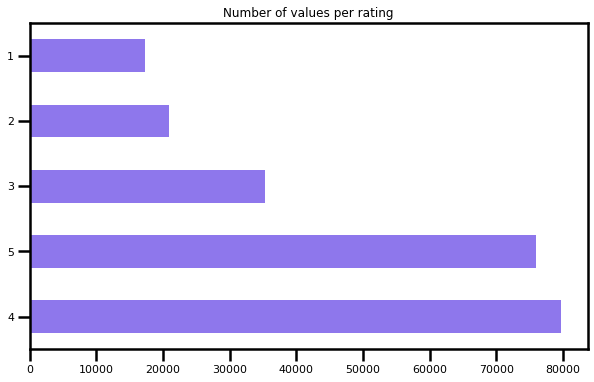

In [5]:
#number of values per star rating
reviews['stars'].value_counts().plot.barh(color = '#8e77ec', figsize = (10,6), title = 'Number of values per rating');

## 3.1 Testing VADER with a random review

In [6]:
#creating a sid object from the VADER
sid = SentimentIntensityAnalyzer()

**Test 1**

In [7]:
test_sid_scores = sid.polarity_scores(reviews.loc[6543]['text'])
test_target_star = reviews.loc[6543]['stars']

print('VADER polarity score: ', test_sid_scores)
print('Actual target star: ', test_target_star)
print('Actual review text:', reviews.text[6543])

VADER polarity score:  {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.8324}
Actual target star:  3
Actual review text: The pizza is just OK. Pretty crowded at lunch time and seating is a nightmare. Get the lunch special, you get a personal pizza slicer and a pan. Would get it to go if I didn't live in the west valley. Good idea to have a separate take out door but don't count on this place to be acceptable for those of us with disabilities to get around.


**Test 2**

In [8]:
test2_sid_scores = sid.polarity_scores(reviews.loc[183761]['text'])
test2_target_star = reviews.loc[183761]['stars']

print('VADER polarity score: ', test2_sid_scores)
print('Actual target star: ', test2_target_star)
print('Actual review text:', reviews.text[183761])

VADER polarity score:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Actual target star:  5
Actual review text: Fan-friggin-tastic!


**Test 3**

In [9]:
test3_sid_scores = sid.polarity_scores(reviews.loc[92701]['text'])
test3_target_star = reviews.loc[92701]['stars']

print('VADER polarity score: ', test3_sid_scores)
print('Actual target star: ', test3_target_star)
print('Actual review text:', reviews.text[92701])

VADER polarity score:  {'neg': 0.279, 'neu': 0.543, 'pos': 0.178, 'compound': -0.3182}
Actual target star:  3
Actual review text: Was cool, then last summer the music got shitty.


## 3.2 Computing polarity scores using compound scores

In [10]:
#creating labels from stars
reviews['label'] = reviews['stars'].apply(lambda s: 'positive' if s >= 4 else ('negative' if s <= 2 else 'neutral'))

In [11]:
%%time

#creating columns in the dataframe that contain relevant data from the polarity scores
reviews['polarity_scores'] = reviews['text'].apply(lambda text: sid.polarity_scores(str(text)))
reviews['compound_score']  = reviews['polarity_scores'].apply(lambda score_dict: score_dict['compound'])
reviews['compound_label'] = reviews['compound_score'].apply(lambda s: 'negative' if s < 0 else ('neutral' if s < 0.5 else 'positive'))
reviews.head()

CPU times: user 5min 22s, sys: 1.35 s, total: 5min 23s
Wall time: 5min 24s


,text,stars,label,polarity_scores,compound_score,compound_label
0,My wife took me here on my birthday for breakf...,5,positive,"{'neg': 0.015, 'neu': 0.687, 'pos': 0.298, 'co...",0.9950,positive
1,I have no idea why some people give bad review...,5,positive,"{'neg': 0.049, 'neu': 0.741, 'pos': 0.21, 'com...",0.9943,positive
2,love the gyro plate. Rice is so good and I als...,4,positive,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",0.8988,positive
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,positive,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.9531,positive
4,General Manager Scott Petello is a good egg!!!...,5,positive,"{'neg': 0.029, 'neu': 0.636, 'pos': 0.334, 'co...",0.9883,positive


## 3.3 Comparison Analysis of compound score and original label

In [12]:
print('Accuracy score: ', accuracy_score(reviews.label, reviews.compound_label))

Accuracy score:  0.7144895910618426


In [13]:
print('Classification Report:\n', classification_report(reviews.label, reviews.compound_label))

Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.39      0.49     38245
     neutral       0.23      0.10      0.14     35268
    positive       0.76      0.93      0.84    155617

    accuracy                           0.71    229130
   macro avg       0.55      0.47      0.49    229130
weighted avg       0.66      0.71      0.67    229130



In [14]:
print(confusion_matrix(reviews.label, reviews.compound_label))

[[ 14802   5341  18102]
 [  3332   3487  28449]
 [  3728   6467 145422]]


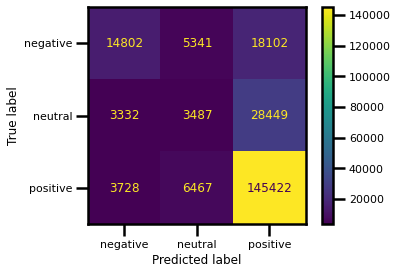

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix(reviews.label, reviews.compound_label), 
                              display_labels=['negative', 'neutral', 'positive'])

disp.plot()
plt.show;